In [46]:
import numpy as np
from datetime import datetime, date, timedelta
from random import uniform
import matplotlib.pyplot as plt
import pandas as pd
from pandas import concat
import pandas_datareader as web
from pandas.plotting import autocorrelation_plot
from scipy.stats import iqr

In [47]:
start=date.today()-timedelta(30)
end=date.today()
df= web.DataReader('SOFI', data_source='yahoo', start=start, end=end)
# df2= web.DataReader('Open', data_source='yahoo', start=start, end=end)
# df3= web.DataReader('FUBO', data_source='yahoo', start=start, end=end)
# df4= web.DataReader('GME', data_source='yahoo', start=start, end=end)
# df5= web.DataReader('AMC', data_source='yahoo', start=start, end=end)
# df6= web.DataReader('DIS', data_source='yahoo', start=start, end=end)
# df7= web.DataReader('F', data_source='yahoo', start=start, end=end)
# df8= web.DataReader('ADA-USD', data_source='yahoo', start=start, end=end)
# df9= web.DataReader('DOT-USD', data_source='yahoo', start=start, end=end)
# df10= web.DataReader('SOL-USD', data_source='yahoo', start=start, end=end)
# df11= web.DataReader('LAC', data_source='yahoo', start=start, end=end)

In [48]:
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-12-06,15.840000,14.500000,15.060000,15.720000,34134800,15.720000
2021-12-07,16.719999,16.120001,16.139999,16.620001,30846600,16.620001
2021-12-08,17.165001,16.250000,16.790001,16.940001,25262600,16.940001
2021-12-09,16.910000,15.550000,16.660000,15.660000,32398900,15.660000
2021-12-10,15.870000,14.870000,15.790000,15.010000,41112000,15.010000
2021-12-13,15.250000,14.020000,14.890000,14.580000,40507500,14.580000
2021-12-14,14.720000,14.160000,14.270000,14.480000,26707800,14.480000
2021-12-15,15.280000,14.030000,14.440000,15.160000,33540400,15.160000
2021-12-16,15.440000,14.180000,15.356000,14.270000,43018000,14.270000


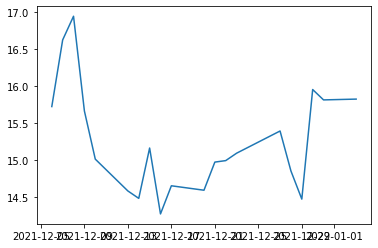

In [98]:
fig,ax = plt.subplots()
ax.plot(df.index,df["Close"])

In [50]:
# fig,ax = plt.subplots()
# ax.plot(df["Close"])
# ax.set_xticklabels(labels = ax.get_xticks(),rotation=90)

Text(0.5, 1.0, 'Closing Prices')

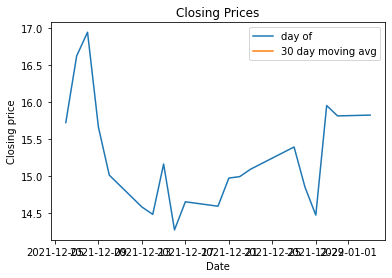

In [51]:
fig,ax = plt.subplots()
ax.plot(df["Close"], label = "day of")
ax.plot(df["Close"].rolling(window = 30).mean(), label = "30 day moving avg")
ax.legend()
ax.set_ylabel("Closing price")
ax.set_xlabel("Date")
ax.set_title("Closing Prices")

In [52]:
from pandas.plotting import lag_plot

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

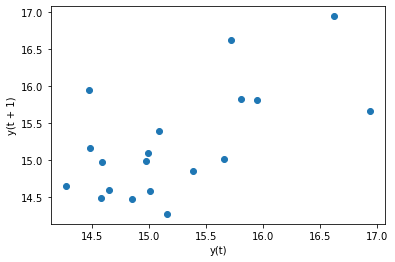

In [53]:
lag_plot(df["Close"]) # note: there seems to be high autocorrelation in this plot

In [54]:
dataframe = concat([df["Close"].shift(1), df["Close"]], axis=1)
dataframe.columns = ['t-1', 't+1']
result = dataframe.corr()
print(result)

          t-1       t+1
t-1  1.000000  0.618871
t+1  0.618871  1.000000


C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\misc.py:411: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = plt.gca(xlim=(1, n), ylim=(-1.0, 1.0))


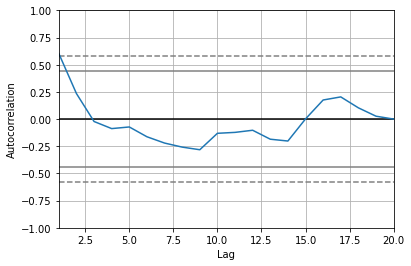

In [55]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df["Close"])
plt.show()

In [56]:
iqR = iqr(df['Close'])

q1 = df['Close'].quantile(.25)
q3 = df['Close'].quantile(.75)

lower_fence = q1 - 1.5 * iqR
upper_fence = q3 + 1.5 * iqR

In [57]:
q1

14.634999752044678

In [58]:
lt_q1 = 0
for i in df["Close"]:
    if i < q1:
        lt_q1 += 1
print(lt_q1/len(df))

0.25


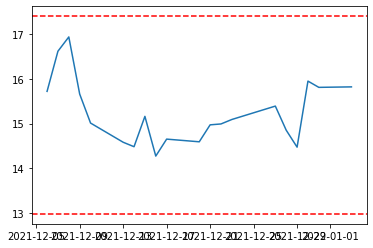

In [59]:
fig,ax = plt.subplots()
ax.plot(df["Close"])
ax.axhline(y=lower_fence, color = "red", ls="--")
ax.axhline(y=upper_fence, color = "red", ls="--")

In [60]:
lower_fence

12.973748922348022

In [61]:
upper_fence

17.403751134872437

In [62]:
any(df['Close'] < lower_fence)

False

In [63]:
any(df['Close'] > upper_fence)

False

In [64]:
min(df['Close'])

14.270000457763672

In [65]:
max(df['Close'])

16.940000534057617

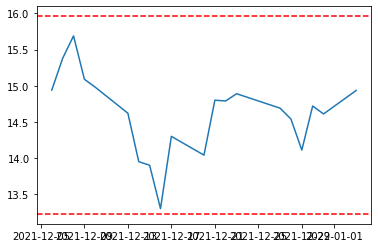

In [69]:
df2= web.DataReader('Open', data_source='yahoo', start=start, end=end)

iqR = iqr(df2['Close'])

q1 = df2['Close'].quantile(.25)
q3 = df2['Close'].quantile(.75)

lower_fence = q1 - 1.5 * iqR
upper_fence = q3 + 1.5 * iqR

fig,ax = plt.subplots()
ax.plot(df2["Close"])
ax.axhline(y=lower_fence, color = "red", ls="--")
ax.axhline(y=upper_fence, color = "red", ls="--")

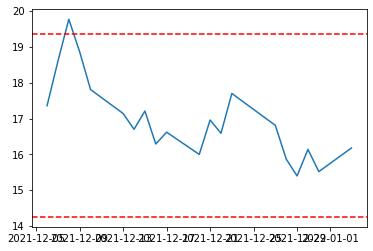

In [72]:
df3 = web.DataReader('FUBO', data_source='yahoo', start=start, end=end)
iqR = iqr(df3['Close'])

q1 = df3['Close'].quantile(.25)
q3 = df3['Close'].quantile(.75)

lower_fence = q1 - 1.5 * iqR
upper_fence = q3 + 1.5 * iqR

fig,ax = plt.subplots()
ax.plot(df3["Close"])
ax.axhline(y=lower_fence, color = "red", ls="--")
ax.axhline(y=upper_fence, color = "red", ls="--")

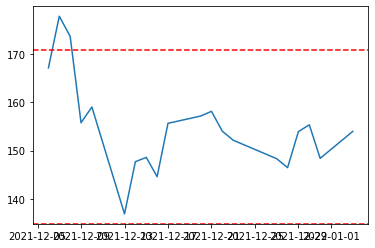

In [75]:
df4= web.DataReader('GME', data_source='yahoo', start=start, end=end)

iqR = iqr(df4['Close'])

q1 = df4['Close'].quantile(.25)
q3 = df4['Close'].quantile(.75)

lower_fence = q1 - 1.5 * iqR
upper_fence = q3 + 1.5 * iqR

fig,ax = plt.subplots()
ax.plot(df4["Close"])
ax.axhline(y=lower_fence, color = "red", ls="--")
ax.axhline(y=upper_fence, color = "red", ls="--")

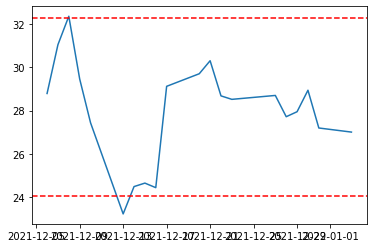

In [77]:
df5= web.DataReader('AMC', data_source='yahoo', start=start, end=end)

iqR = iqr(df5['Close'])

q1 = df5['Close'].quantile(.25)
q3 = df5['Close'].quantile(.75)

lower_fence = q1 - 1.5 * iqR
upper_fence = q3 + 1.5 * iqR

fig,ax = plt.subplots()
ax.plot(df5["Close"])
ax.axhline(y=lower_fence, color = "red", ls="--")
ax.axhline(y=upper_fence, color = "red", ls="--")

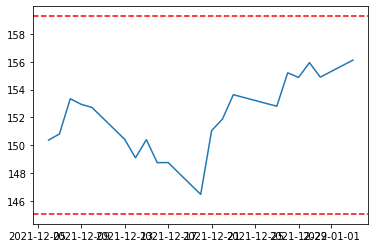

In [78]:
df6= web.DataReader('DIS', data_source='yahoo', start=start, end=end)

iqR = iqr(df6['Close'])

q1 = df6['Close'].quantile(.25)
q3 = df6['Close'].quantile(.75)

lower_fence = q1 - 1.5 * iqR
upper_fence = q3 + 1.5 * iqR

fig,ax = plt.subplots()
ax.plot(df6["Close"])
ax.axhline(y=lower_fence, color = "red", ls="--")
ax.axhline(y=upper_fence, color = "red", ls="--")

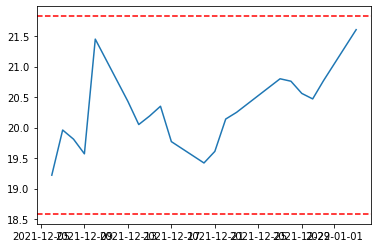

In [79]:
df7= web.DataReader('F', data_source='yahoo', start=start, end=end)

iqR = iqr(df7['Close'])

q1 = df7['Close'].quantile(.25)
q3 = df7['Close'].quantile(.75)

lower_fence = q1 - 1.5 * iqR
upper_fence = q3 + 1.5 * iqR

fig,ax = plt.subplots()
ax.plot(df7["Close"])
ax.axhline(y=lower_fence, color = "red", ls="--")
ax.axhline(y=upper_fence, color = "red", ls="--")

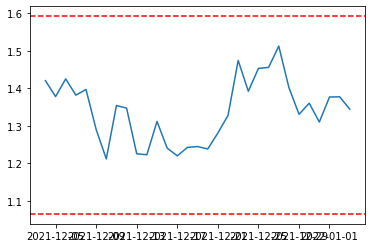

In [80]:
df8= web.DataReader('ADA-USD', data_source='yahoo', start=start, end=end)

iqR = iqr(df8['Close'])

q1 = df8['Close'].quantile(.25)
q3 = df8['Close'].quantile(.75)

lower_fence = q1 - 1.5 * iqR
upper_fence = q3 + 1.5 * iqR

fig,ax = plt.subplots()
ax.plot(df8["Close"])
ax.axhline(y=lower_fence, color = "red", ls="--")
ax.axhline(y=upper_fence, color = "red", ls="--")

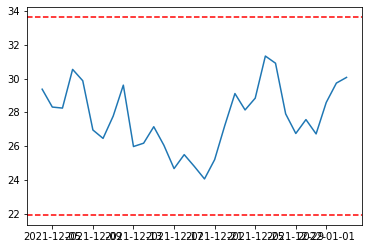

In [81]:
df9= web.DataReader('DOT-USD', data_source='yahoo', start=start, end=end)

iqR = iqr(df9['Close'])

q1 = df9['Close'].quantile(.25)
q3 = df9['Close'].quantile(.75)

lower_fence = q1 - 1.5 * iqR
upper_fence = q3 + 1.5 * iqR

fig,ax = plt.subplots()
ax.plot(df9["Close"])
ax.axhline(y=lower_fence, color = "red", ls="--")
ax.axhline(y=upper_fence, color = "red", ls="--")

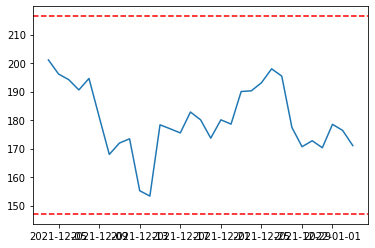

In [82]:
df10= web.DataReader('SOL-USD', data_source='yahoo', start=start, end=end)

iqR = iqr(df10['Close'])

q1 = df10['Close'].quantile(.25)
q3 = df10['Close'].quantile(.75)

lower_fence = q1 - 1.5 * iqR
upper_fence = q3 + 1.5 * iqR

fig,ax = plt.subplots()
ax.plot(df10["Close"])
ax.axhline(y=lower_fence, color = "red", ls="--")
ax.axhline(y=upper_fence, color = "red", ls="--")

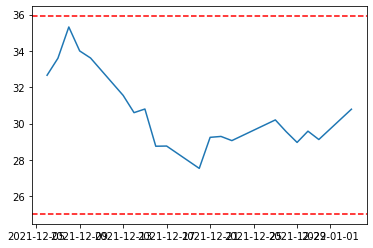

In [83]:
df11= web.DataReader('LAC', data_source='yahoo', start=start, end=end)

iqR = iqr(df11['Close'])

q1 = df11['Close'].quantile(.25)
q3 = df11['Close'].quantile(.75)

lower_fence = q1 - 1.5 * iqR
upper_fence = q3 + 1.5 * iqR

fig,ax = plt.subplots()
ax.plot(df11["Close"])
ax.axhline(y=lower_fence, color = "red", ls="--")
ax.axhline(y=upper_fence, color = "red", ls="--")